# PREDIKSI DAN SEGMENTASI RISIKO DIABETES PADA PASIEN PIMA INDIAN MENGGUNAKAN LOGISTIC REGRESSION

## Business Understanding

**Determine Business Objectives**

Tujuan utama dari proyek ini adalah untuk membantu tenaga medis atau institusi kesehatan dalam mengidentifikasi pasien yang berisiko tinggi mengidap diabetes. Dengan prediksi dini berdasarkan data medis, tindakan pencegahan atau penanganan lebih lanjut dapat dilakukan secara proaktif, sehingga dapat menurunkan risiko komplikasi kesehatan yang lebih serius di kemudian hari.

**Assess Situation**
*   Sumber Data: Dataset berasal dari National Institute of Diabetes and Digestive and Kidney Diseases dan tersedia secara publik melalui platform Kaggle. Data ini hanya mencakup perempuan berusia ≥21 tahun dari suku Pima Indian
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/
*   Kendala:
Data terbatas pada satu kelompok etnis dan gender. Dan terdapat nilai nol atau tidak masuk akal pada beberapa kolom medis (seperti tekanan darah, BMI, kadar insulin).

**Determine Analytical Goals**

Tujuan analitik dari proyek ini adalah:
*   Supervised Learning: Membangun model klasifikasi untuk memprediksi apakah seorang pasien menderita diabetes (menggunakan Logistic Regression atau Naïve Bayes).
*   Unsupervised Learning: Melakukan segmentasi pasien berdasarkan karakteristik medis menggunakan algoritma K-Means Clustering untuk mengidentifikasi pola atau kelompok risiko.

**Produce Project Plan**

Rencana kerja proyek berdasarkan metodologi CRISP-DM:
- Understanding Data: Memuat dan memahami struktur dataset (variabel, tipe data, distribusi).
- Data Preparation: Pembersihan data, menangani missing values, normalisasi/standarisasi, dll.
- Modeling:
  1. Supervised: Membangun dan evaluasi model klasifikasi (Logistic Regression atau Naïve Bayes).
  2. Unsupervised: Melakukan clustering dengan K-Means
- Evaluation: Menilai kinerja model dengan metrik seperti akurasi, precision, recall, dan visualisasi clustering.
- Deployment: Hasil akhir disajikan dalam bentuk laporan, presentasi, dan di-deploy dalam web dashboard interaktif.

##Data Understanding

In [1230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Membaca dan menampilkan beberapa baris awal untuk memahami struktur data

In [1231]:
df = pd.read_csv('https://raw.githubusercontent.com/ulhaqdhifulloh/TUBES-DATMIN-TEAM2-SI4706/main/diabetes.csv')
df_copy = df.copy()
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Melihat informasi tentang tipe data, kolom, jumlah nilai nol, penggunaan memori, bentuk, dll

In [1232]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1233]:
df_copy.shape

(768, 9)

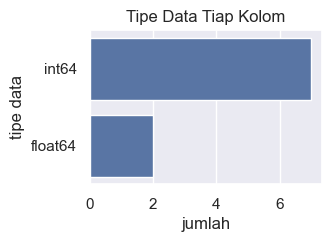

In [1234]:
plt.figure(figsize=(3,2))
sns.set(font_scale=1)
sns.countplot(y=df_copy.dtypes ,data=df_copy)
plt.xlabel("jumlah")
plt.ylabel("tipe data")
plt.title("Tipe Data Tiap Kolom")
plt.show()

Melihat statistik deskriptif yang merangkum kecenderungan sentral, dispersi, dan bentuk distribusi set data

In [1235]:
df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [1236]:
df_copy.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Mengecek duplikasi pada data

In [1237]:
print("Jumlah duplikasi data: ",df_copy.duplicated().sum())

Jumlah duplikasi data:  0


Mengecek nilai null pada data

In [1238]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Mengecek nilai nol yang tidak masuk akal pada data

In [1239]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Melihat distribusi data

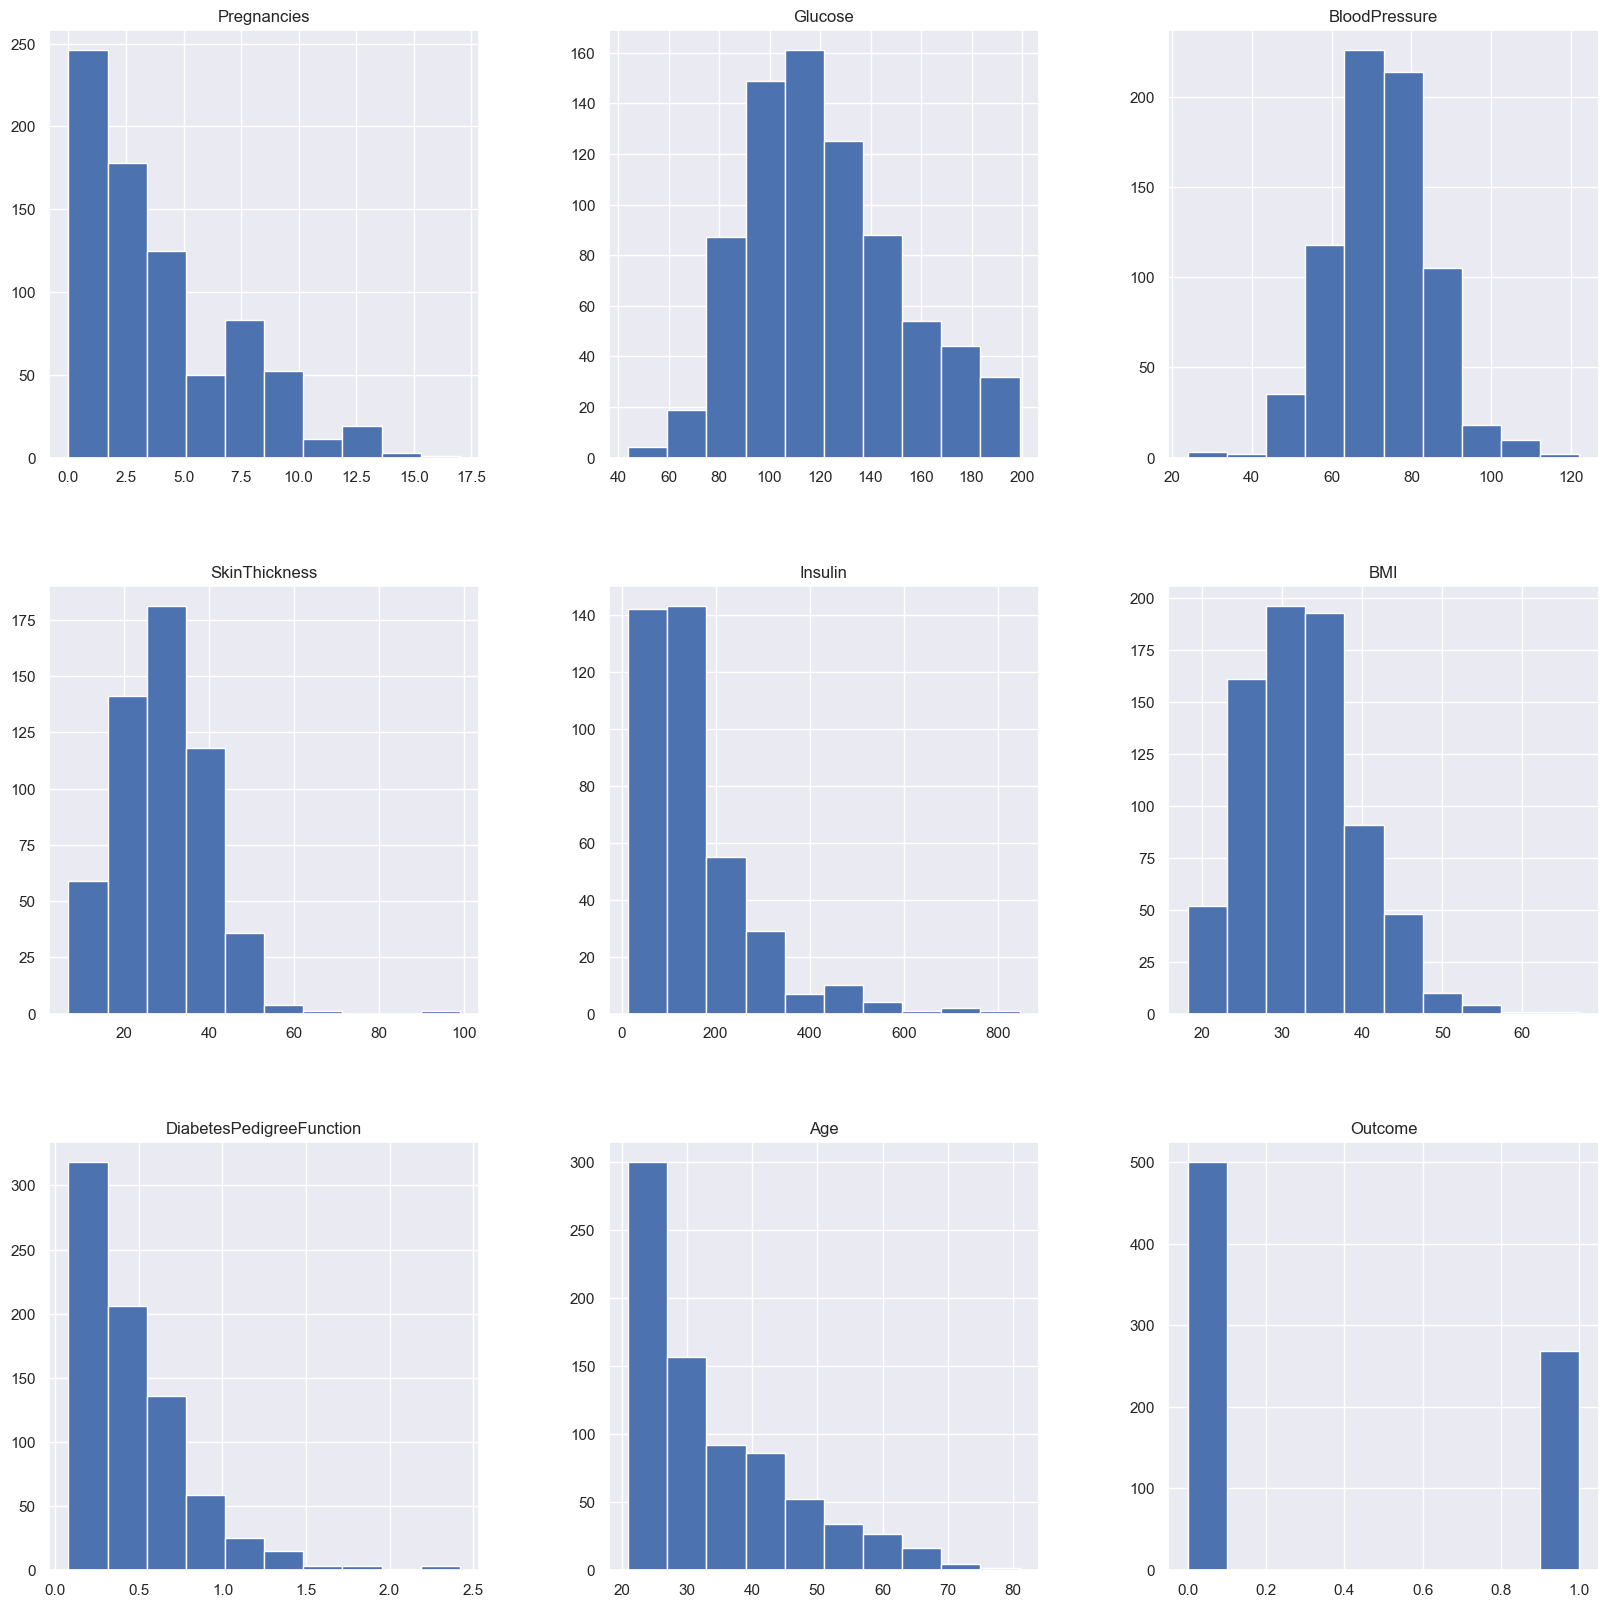

In [1240]:
p = df_copy.hist(figsize = (20,20))

Memeriksa korelasi data (heatmap)

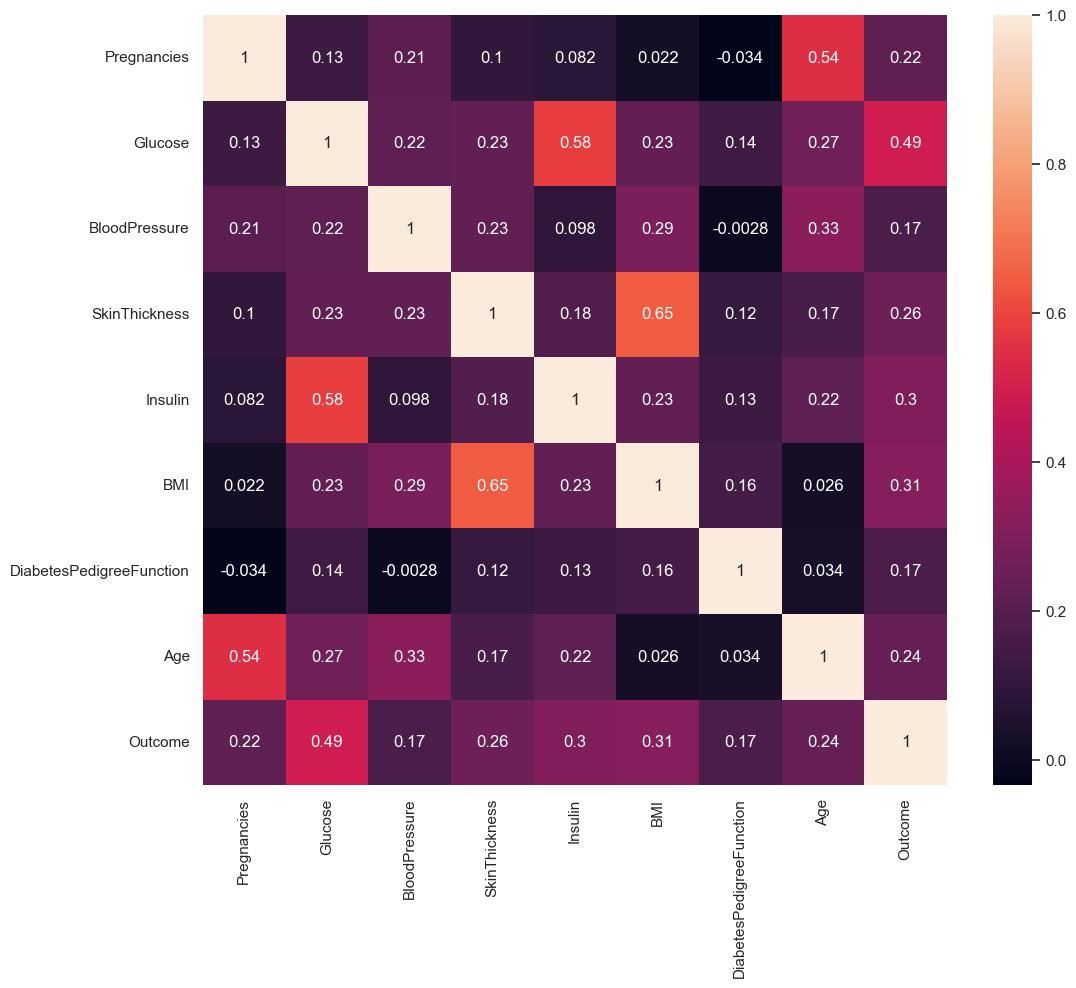

In [1241]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(), annot=True)

Distribusi Target (Outcome)

Outcome
0    500
1    268
Name: count, dtype: int64


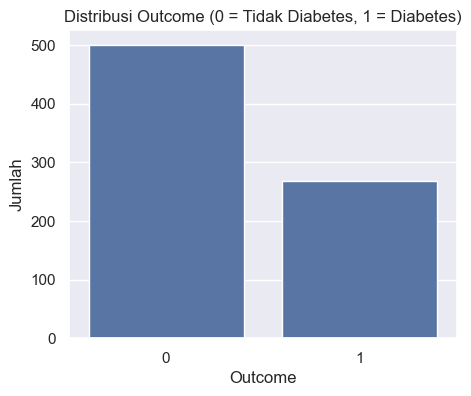

In [1242]:
print(df_copy.Outcome.value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df_copy)
plt.title("Distribusi Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.show()

Pair Plot (Scatter Matrix)

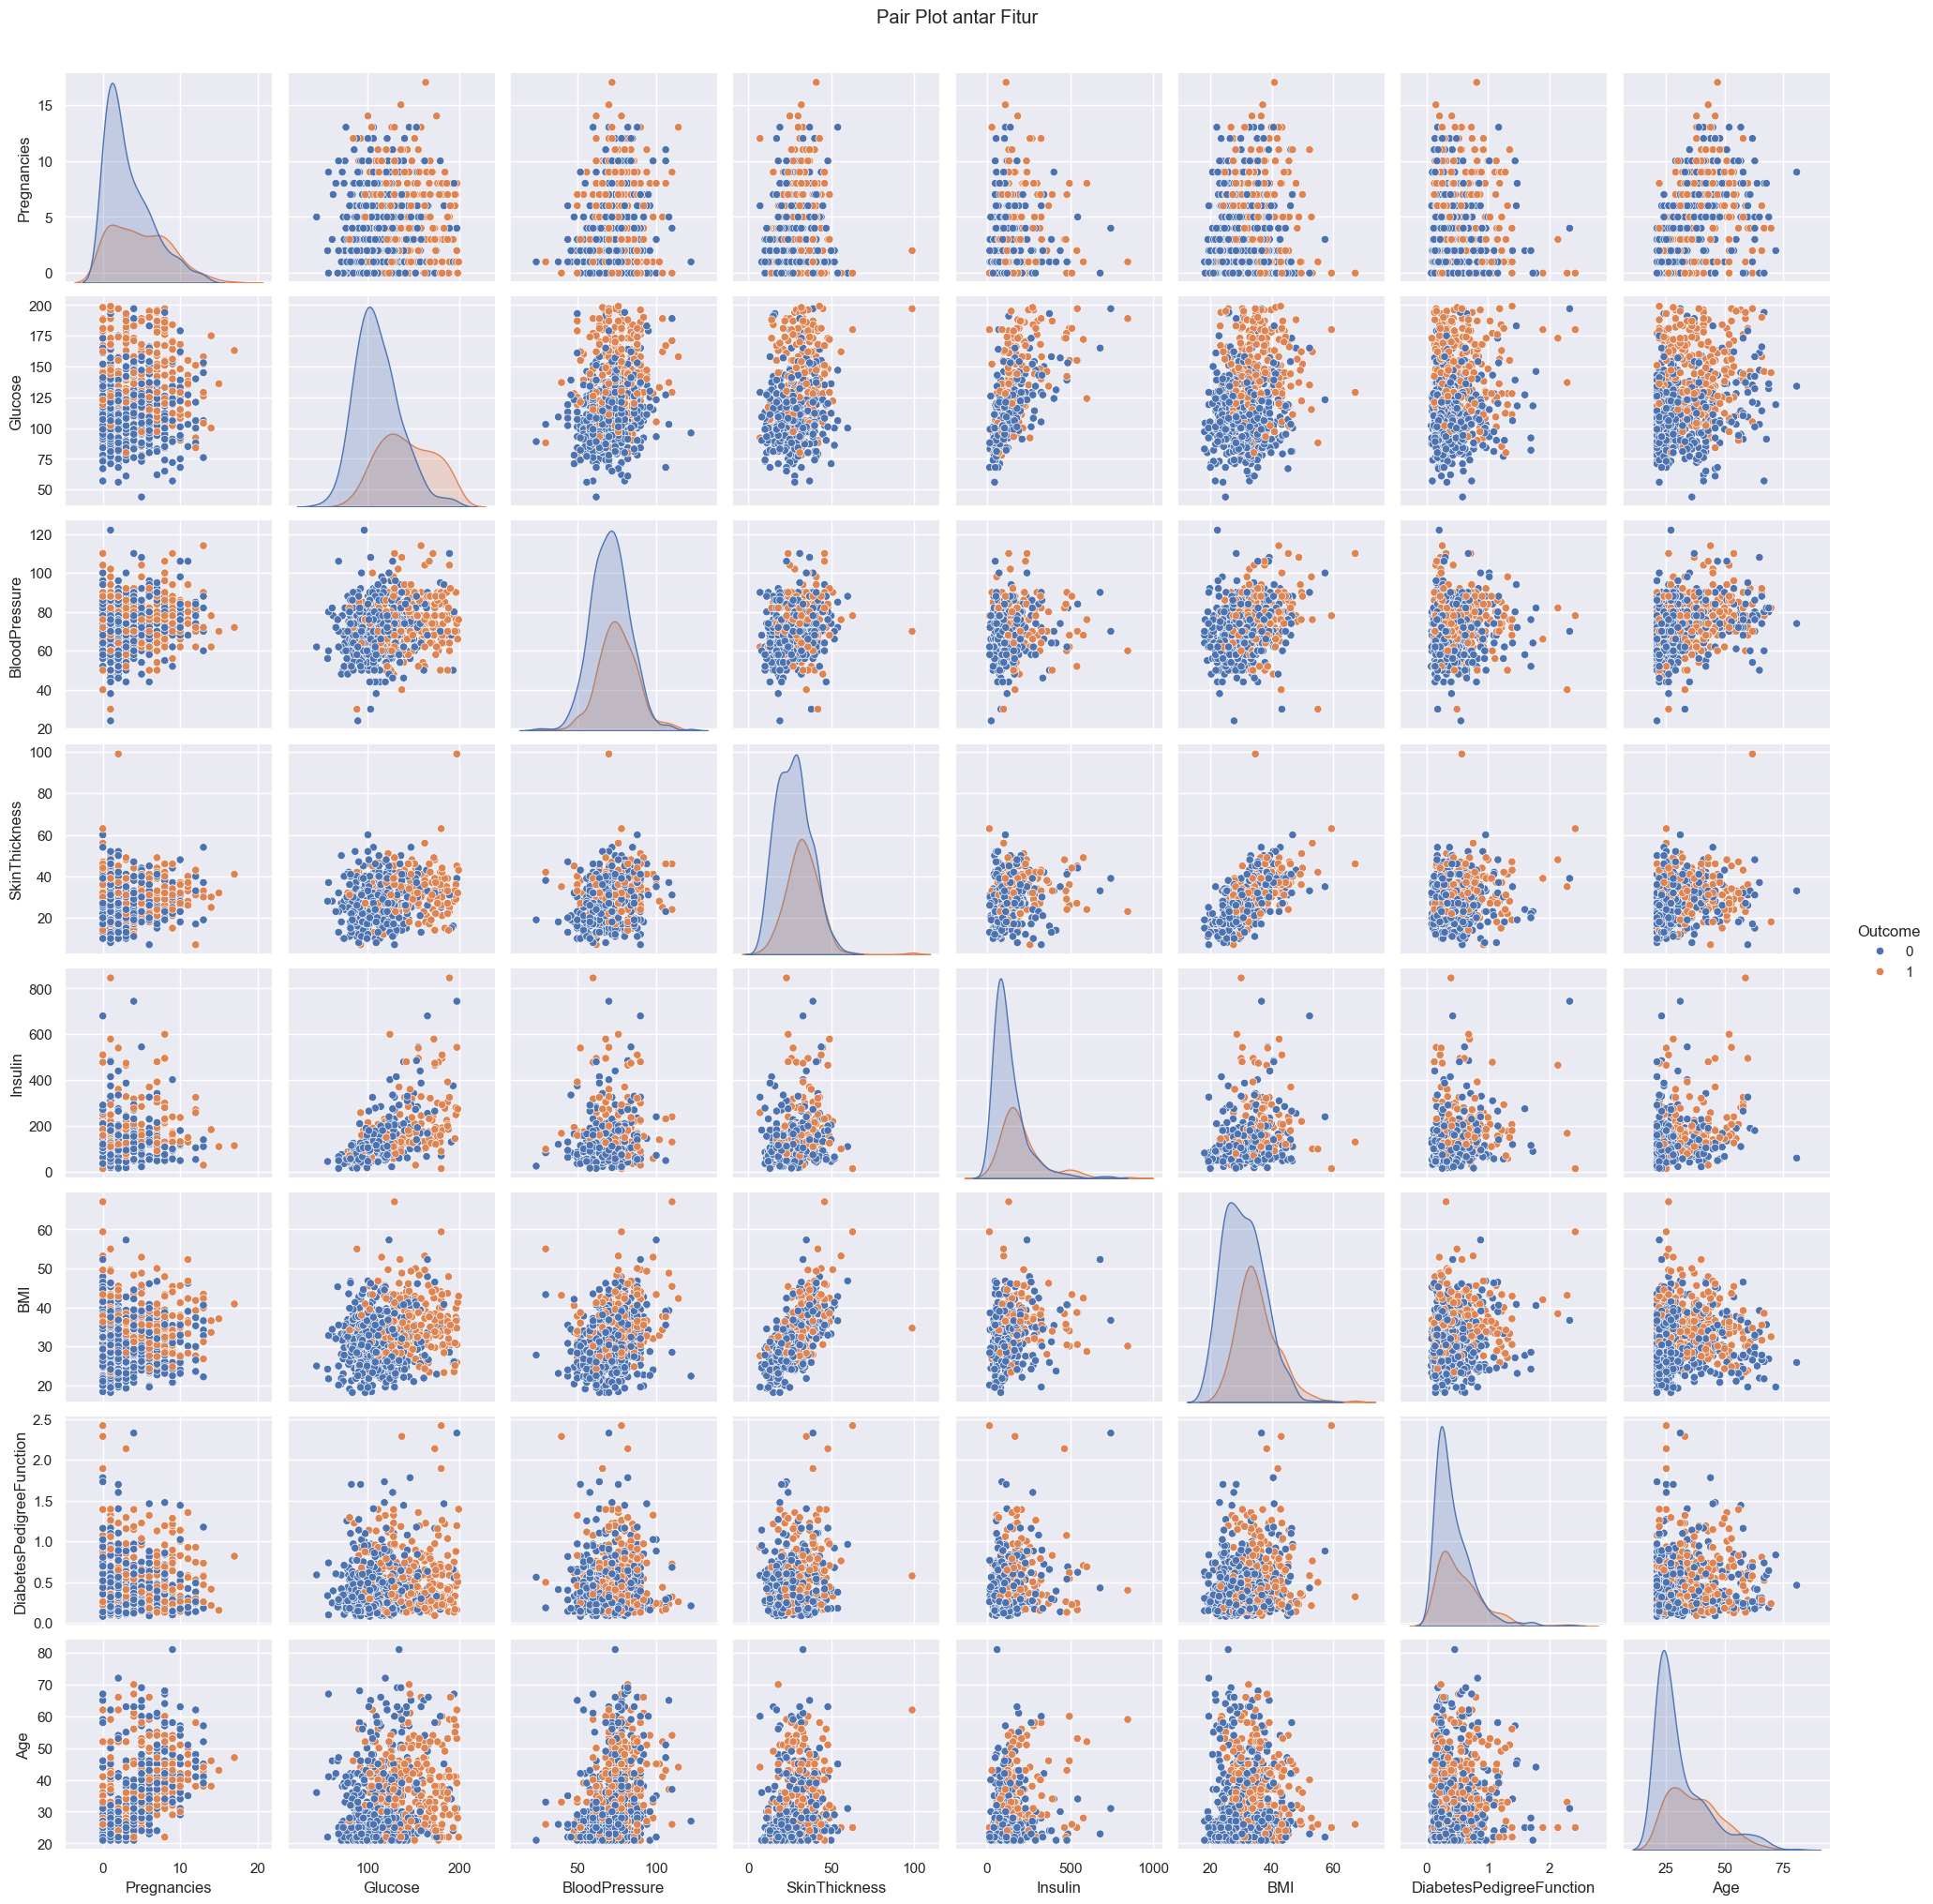

In [1243]:
sns.pairplot(df_copy, hue="Outcome")
plt.suptitle("Pair Plot antar Fitur", y=1.02)
plt.show()

Outlier Detection

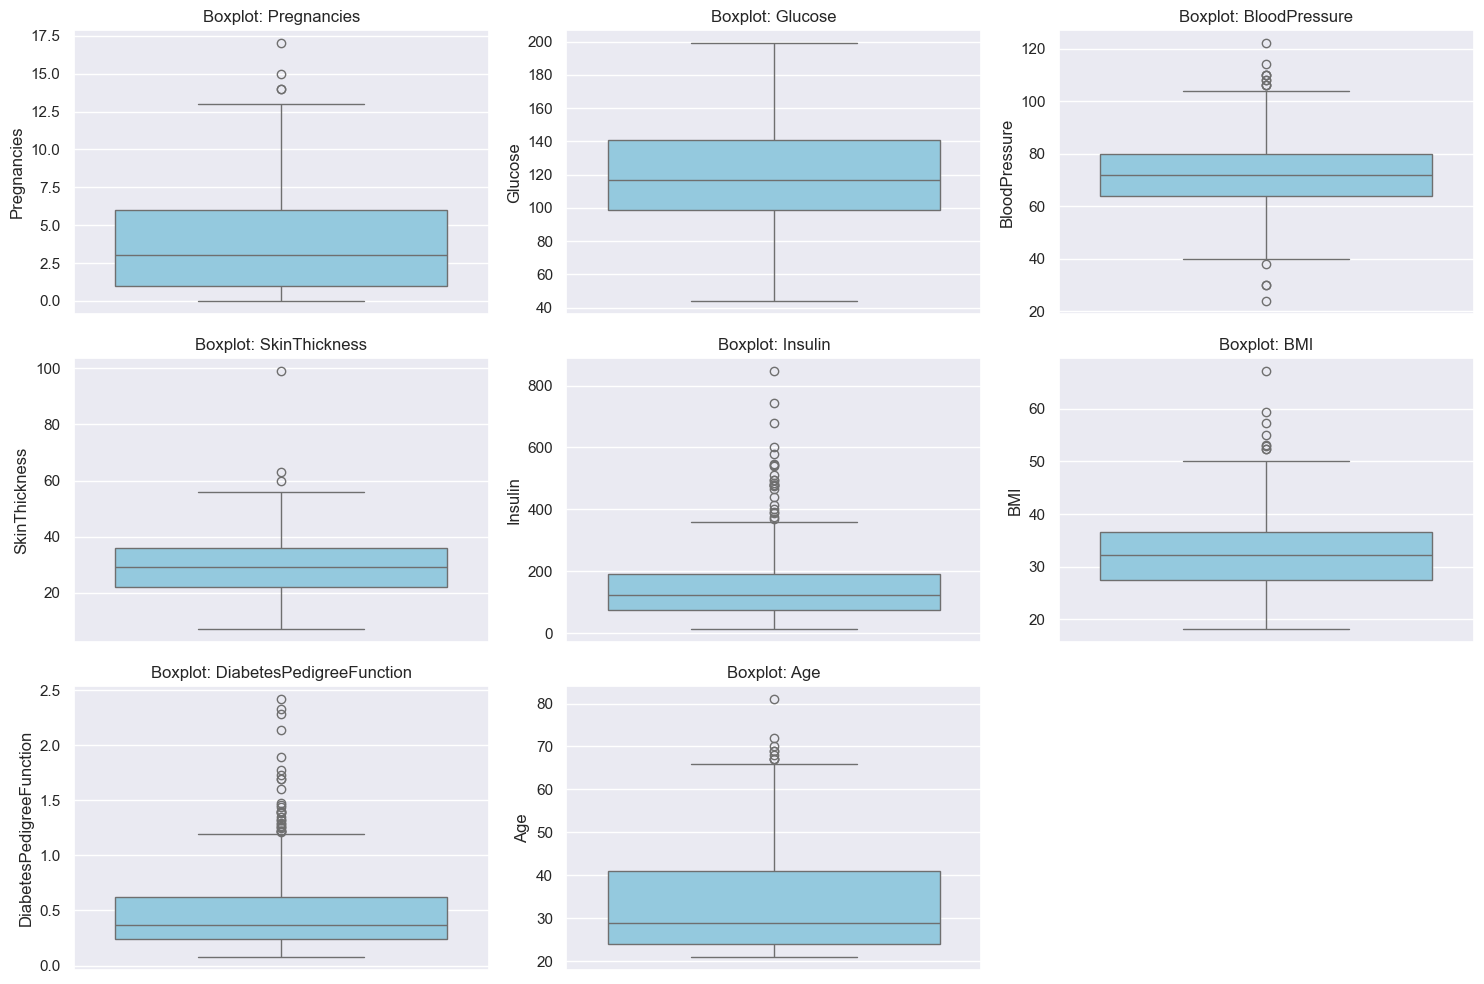

In [1244]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_copy.select_dtypes(include='number').columns):
    if col != 'Outcome':
        plt.subplot(3, 3, i+1)
        sns.boxplot(data=df_copy, y=col, color='skyblue')
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()

plt.show()

**Kesimpulan:**

Dalam dataset Pima Indians Diabetes, ditemukan bahwa beberapa kolom memiliki nilai minimum nol (0) yang secara medis tidak masuk akal dan mengindikasikan nilai yang hilang (missing values tersembunyi). Kolom-kolom tersebut adalah:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Secara logis, seseorang tidak mungkin memiliki kadar glukosa, tekanan darah, insulin, ketebalan kulit, atau BMI bernilai nol, sehingga nilai-nilai tersebut tidak valid sebagai pengukuran medis.

##Data Preparation

In [1245]:
import numpy as np
from sklearn.preprocessing import StandardScaler

###Data Cleansing

Drop Duplikasi Data

In [1246]:
df_copy = df_copy.drop_duplicates()

Penanganan Nilai Tidak Valid

In [1247]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_copy[cols_with_zero_invalid] = df_copy[cols_with_zero_invalid].replace(0, np.nan)

In [1248]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3803313898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3803313898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Deteksi dan Penanganan Outlier

In [1249]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower = quartile1 - 1.5 * iqr
    upper = quartile3 + 1.5 * iqr
    return lower, upper

def replace_with_thresholds(dataframe, variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

for col in df_copy.columns[:-1]:  # exclude Outcome
    replace_with_thresholds(df_copy, col)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3172710673.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3172710673.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low


###Data Transformation

Feature Scaling (Standarisasi)

In [1250]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_copy.drop(columns=['Outcome'])),
                        columns=df_copy.drop(columns=['Outcome']).columns)
y = df_copy['Outcome']
df = pd.concat([X_scaled, y], axis=1)

In [1251]:
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.647150  0.865108      -0.032212       0.824667  0.039062  0.181092   
1    -0.848970 -1.206162      -0.545506       0.017945  0.039062 -0.869465   
2     1.245598  2.015813      -0.716604       0.017945  0.039062 -1.364728   
3    -0.848970 -1.074652      -0.545506      -0.788777 -1.494110 -0.644346   
4    -1.148194  0.503458      -2.769778       0.824667  1.414175  1.606849   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.588927  1.445691        1  
1                 -0.378101 -0.189304        0  
2                  0.746595 -0.103252        1  
3                 -1.022787 -1.049828        0  
4                  2.596563 -0.017199        1

###Data Balancing

Random Oversampling

In [1252]:
major = df[df['Outcome'] == 0].copy()
minor = df[df['Outcome'] == 1].copy()

In [1253]:
minor_oversampled = minor.sample(n=len(major), replace=True, random_state=42)

In [1254]:
df = pd.concat([major, minor_oversampled])
df = df.reset_index(drop=True)

Outcome
0    500
1    500
Name: count, dtype: int64


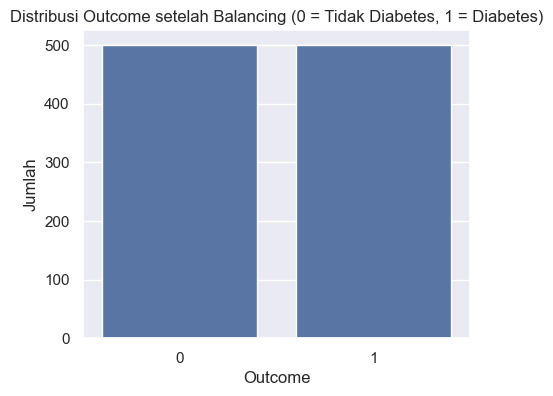

In [1255]:
print(df.Outcome.value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Outcome setelah Balancing (0 = Tidak Diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.show()

##Modeling

###Model Logistic Regression

In [1256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import GridSearchCV

####Split Dataset

In [1257]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####Build model

Menginisiasi dan melatih model logistic regression

In [1258]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Membuat prediksi dari model yang sudah dilatih

In [1259]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1])

####Evaluasi Model

Menampilkan intercept dan koefisien

In [1260]:
intercept = log_reg.intercept_
coefficients = log_reg.coef_
print("Intercept:", intercept)
print("Koefisien:", coefficients)

Intercept: [-0.20153479]
Koefisien: [[0.44802335 1.11847366 0.01326991 0.15240595 0.15899971 0.56139532
  0.19817666 0.11432394]]


Mendapatkan p-value dari model

In [1261]:
X_const = sm.add_constant(X)

logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507234
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.2682
Time:                        21:53:08   Log-Likelihood:                -507.23
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.976e-75
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1920      0.079     -2.441      0.015      -0.346

Menampilkan p-value dari variabel prediktor

In [1262]:
print("P-value variabel prediktor:")
print(result.pvalues)

P-value variabel prediktor:
const                       1.464570e-02
Pregnancies                 1.332454e-05
Glucose                     1.828779e-24
BloodPressure               7.491303e-01
SkinThickness               1.831140e-01
Insulin                     1.859391e-01
BMI                         4.106807e-07
DiabetesPedigreeFunction    2.939180e-03
Age                         3.988005e-02
dtype: float64


Membuat prediksi dari model yang sudah dilatih

In [1263]:
y_pred_log = log_reg.predict(X_test)

Menampilkan akurasi hasil prediksi model

In [1264]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Akurasi :", accuracy)

Akurasi : 0.725


Menampilkan Confusion Matrix

In [1265]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix

array([[74, 26],
       [29, 71]])

Menampilkan classification report hasil prediksi model

In [1266]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       100
           1       0.73      0.71      0.72       100

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



# PREDIKSI DAN SEGMENTASI RISIKO DIABETES PADA PASIEN PIMA INDIAN MENGGUNAKAN K-MEANS CLUSTERING

## Business Understanding

**Determine Business Objectives**

Tujuan utama dari proyek ini adalah untuk membantu tenaga medis atau institusi kesehatan dalam mengidentifikasi pasien yang berisiko tinggi mengidap diabetes. Dengan prediksi dini berdasarkan data medis, tindakan pencegahan atau penanganan lebih lanjut dapat dilakukan secara proaktif, sehingga dapat menurunkan risiko komplikasi kesehatan yang lebih serius di kemudian hari.

**Assess Situation**
*   Sumber Data: Dataset berasal dari National Institute of Diabetes and Digestive and Kidney Diseases dan tersedia secara publik melalui platform Kaggle. Data ini hanya mencakup perempuan berusia ≥21 tahun dari suku Pima Indian
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/
*   Kendala:
Data terbatas pada satu kelompok etnis dan gender. Dan terdapat nilai nol atau tidak masuk akal pada beberapa kolom medis (seperti tekanan darah, BMI, kadar insulin).

**Determine Analytical Goals**

Tujuan analitik dari proyek ini adalah:
*   Supervised Learning: Membangun model klasifikasi untuk memprediksi apakah seorang pasien menderita diabetes (menggunakan Logistic Regression atau Naïve Bayes).
*   Unsupervised Learning: Melakukan segmentasi pasien berdasarkan karakteristik medis menggunakan algoritma K-Means Clustering untuk mengidentifikasi pola atau kelompok risiko.

**Produce Project Plan**

Rencana kerja proyek berdasarkan metodologi CRISP-DM:
- Understanding Data: Memuat dan memahami struktur dataset (variabel, tipe data, distribusi).
- Data Preparation: Pembersihan data, menangani missing values, normalisasi/standarisasi, dll.
- Modeling:
  1. Supervised: Membangun dan evaluasi model klasifikasi (Logistic Regression atau Naïve Bayes).
  2. Unsupervised: Melakukan clustering dengan K-Means
- Evaluation: Menilai kinerja model dengan metrik seperti akurasi, precision, recall, dan visualisasi clustering.
- Deployment: Hasil akhir disajikan dalam bentuk laporan, presentasi, dan di-deploy dalam web dashboard interaktif.

##Data Understanding

Import Library yang Dibutuhkan

In [1267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Membaca dan menampilkan beberapa baris awal untuk memahami struktur data

In [1268]:
df = pd.read_csv('https://raw.githubusercontent.com/ulhaqdhifulloh/TUBES-DATMIN-TEAM2-SI4706/main/diabetes.csv')
df_copy = df.copy()
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Melihat informasi tentang tipe data, kolom, jumlah nilai nol, penggunaan memori, bentuk, dll

In [1269]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1270]:
print("Dimensi Data (baris, kolom):", df_copy.shape)

Dimensi Data (baris, kolom): (768, 9)


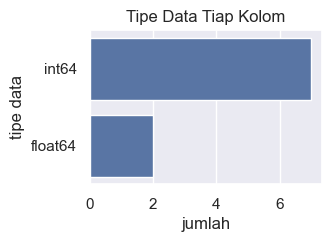

In [1271]:
plt.figure(figsize=(3,2))
sns.set(font_scale=1)
sns.countplot(y=df_copy.dtypes ,data=df_copy)
plt.xlabel("jumlah")
plt.ylabel("tipe data")
plt.title("Tipe Data Tiap Kolom")
plt.show()

Melihat statistik deskriptif yang merangkum kecenderungan sentral, dispersi, dan bentuk distribusi set data

In [1272]:
df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [1273]:
df_copy.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Mengecek duplikasi pada data

In [1274]:
print("Jumlah duplikasi data: ",df_copy.duplicated().sum())

Jumlah duplikasi data:  0


Mengecek nilai null pada data

In [1275]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Mengecek nilai nol yang tidak masuk akal pada data

In [1276]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Melihat distribusi data

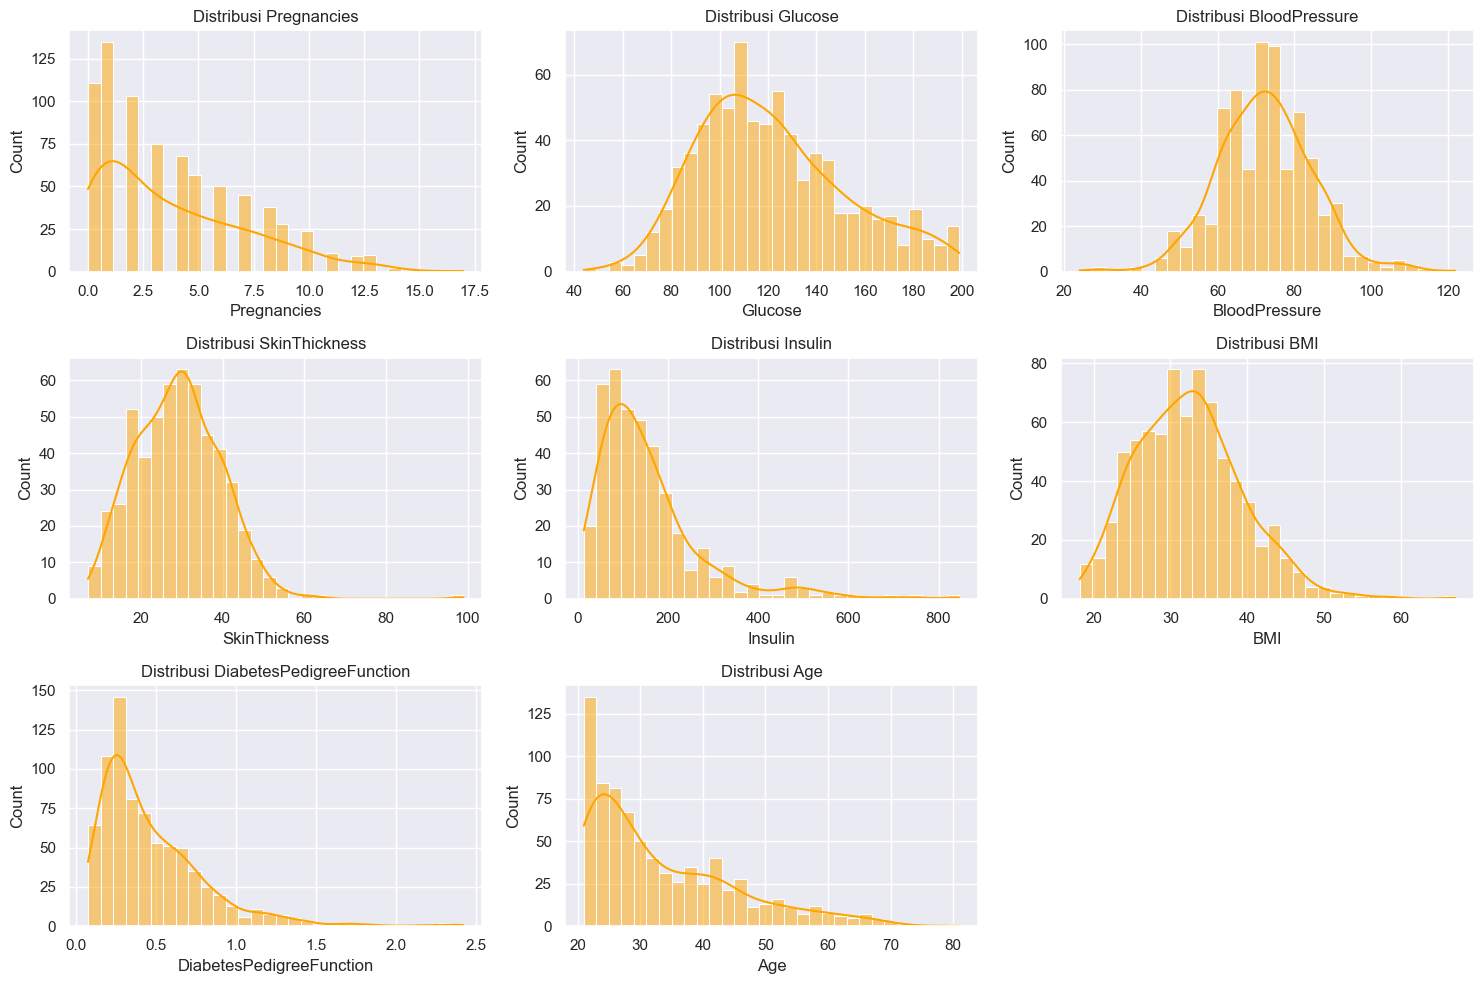

In [1277]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_copy.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_copy[column], bins=30, kde=True, color='orange')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Memeriksa korelasi data (heatmap)

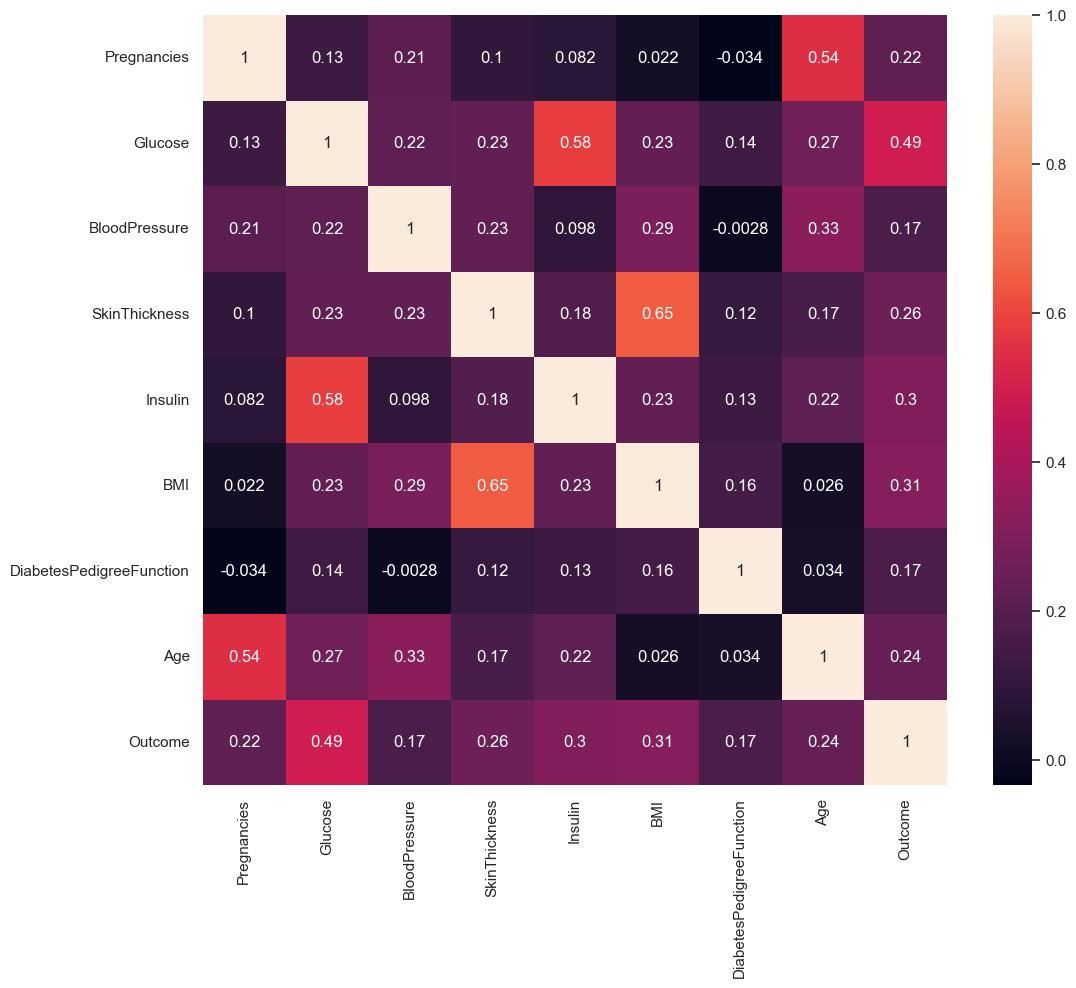

In [1278]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(), annot=True)

Pair Plot (Scatter Matrix)

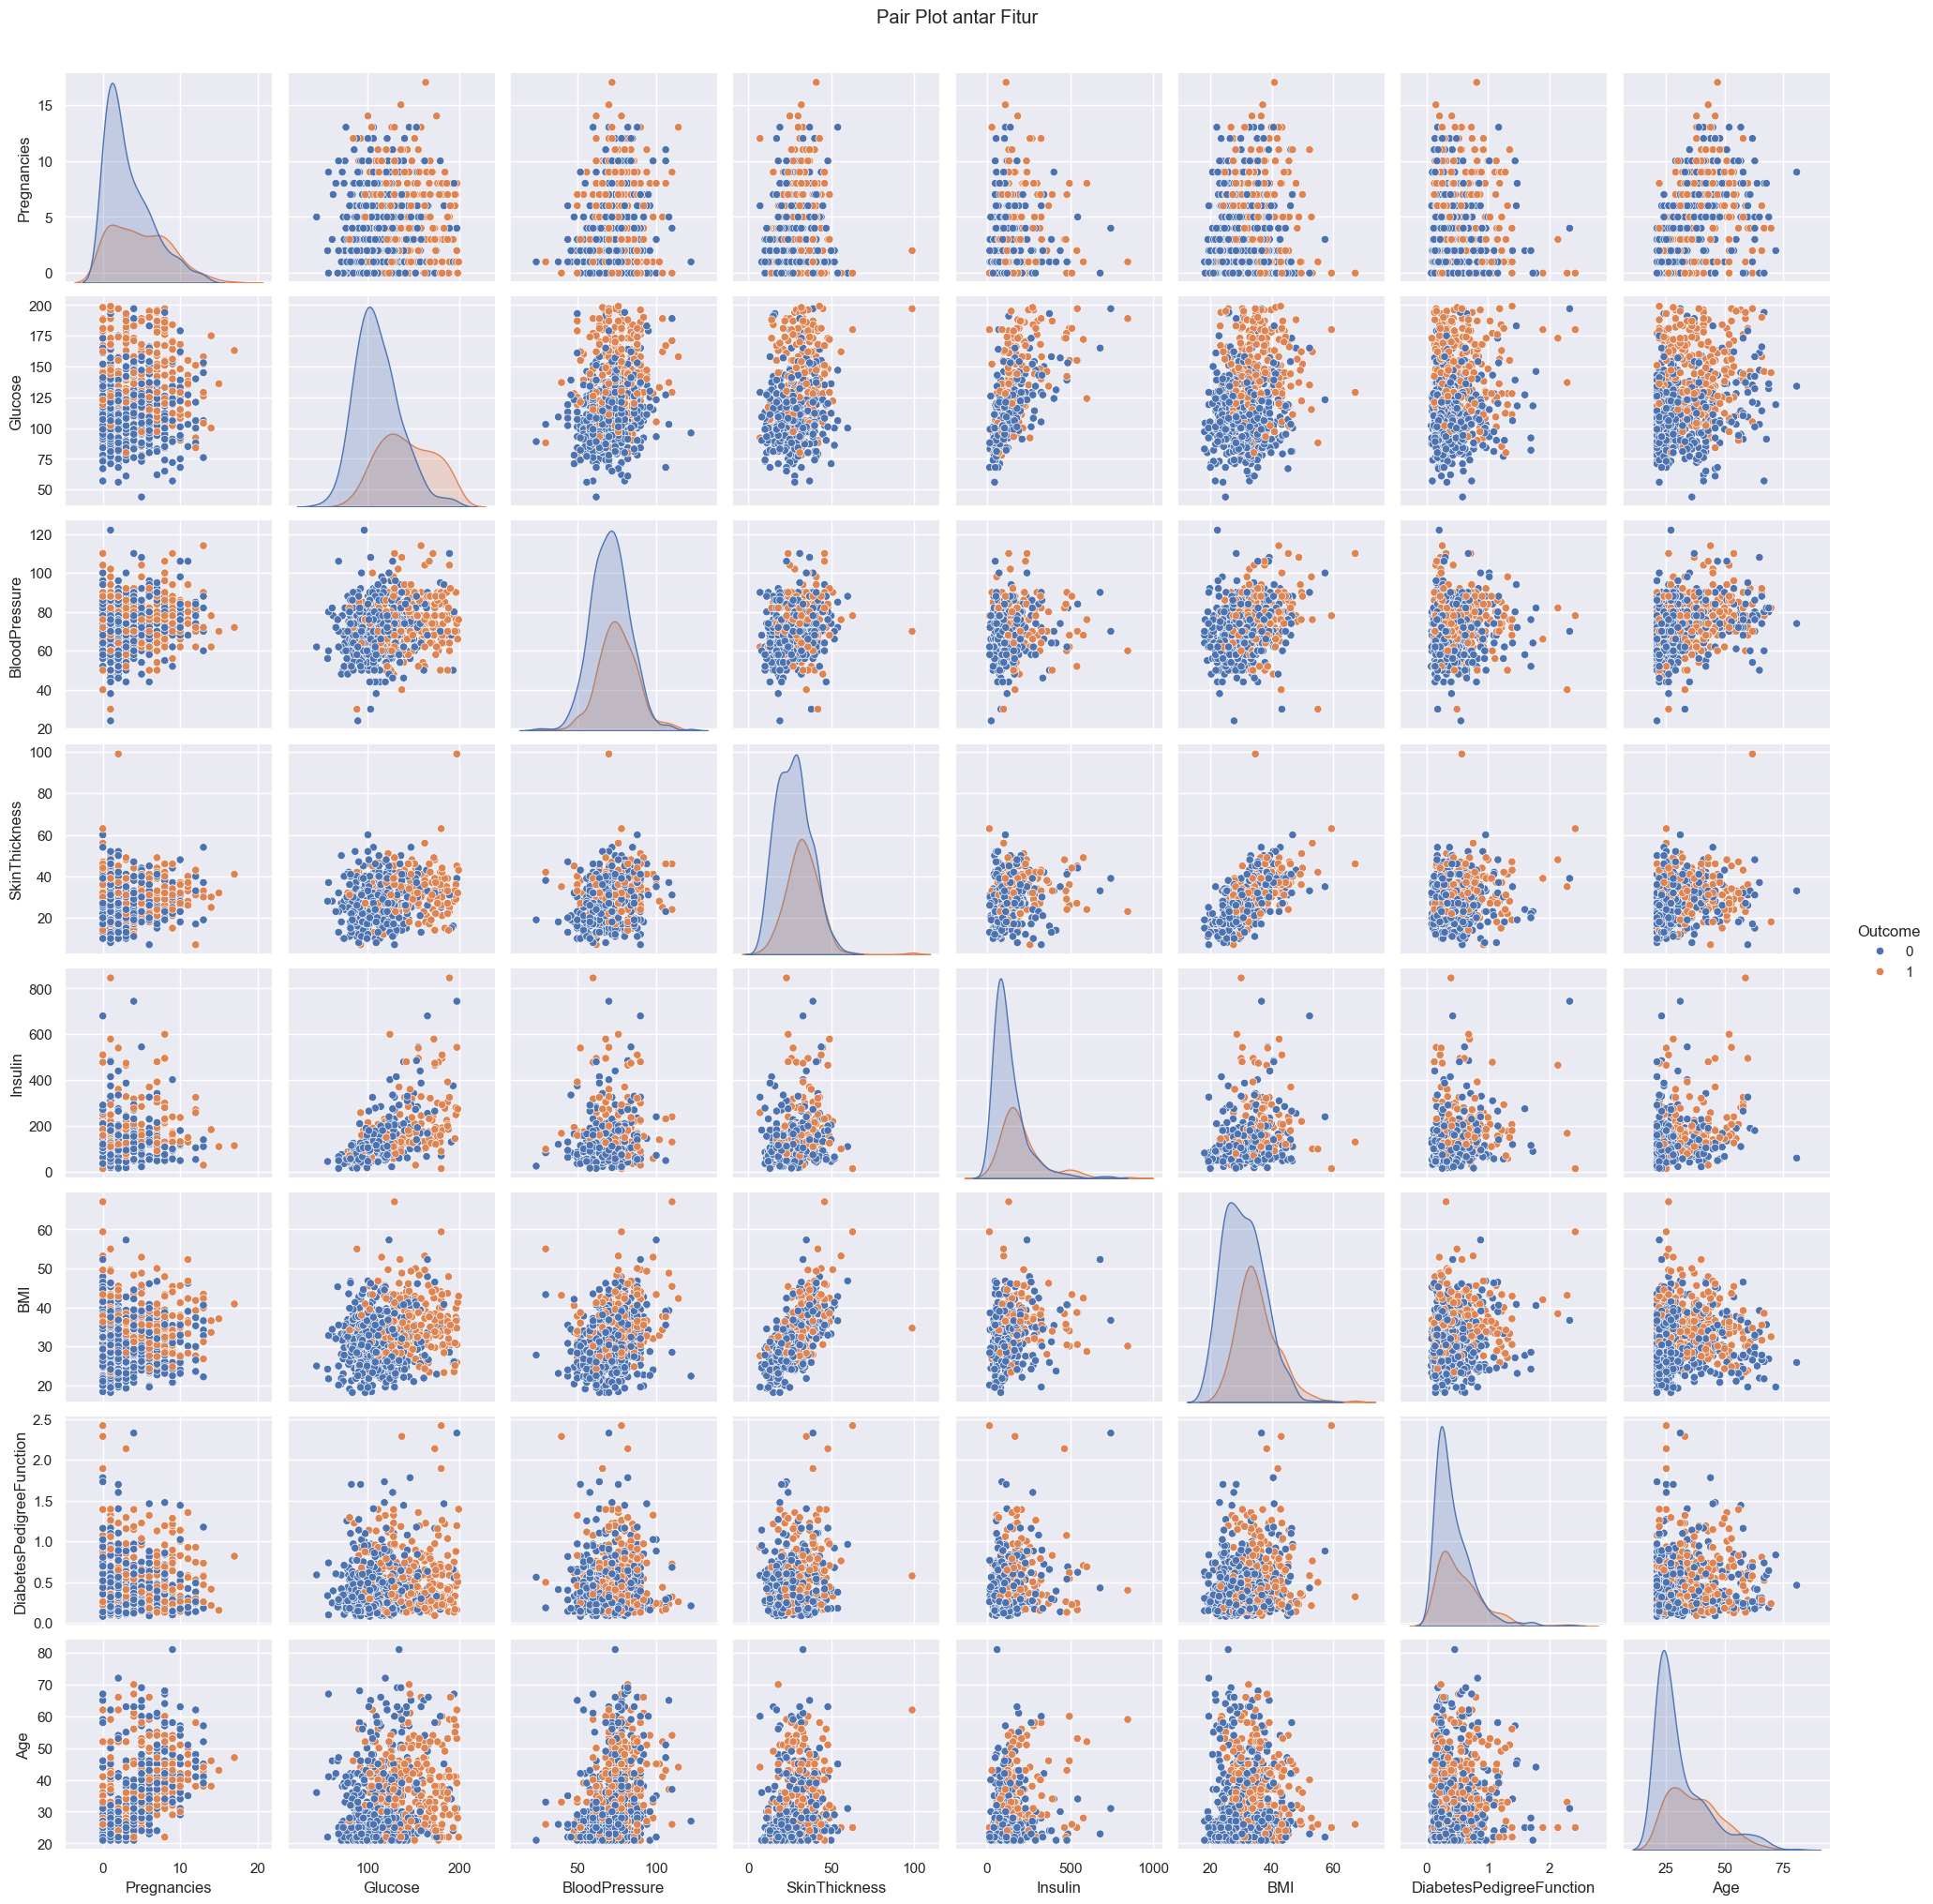

In [1279]:
sns.pairplot(df_copy, hue="Outcome")
plt.suptitle("Pair Plot antar Fitur", y=1.02)
plt.show()

Outlier Detection

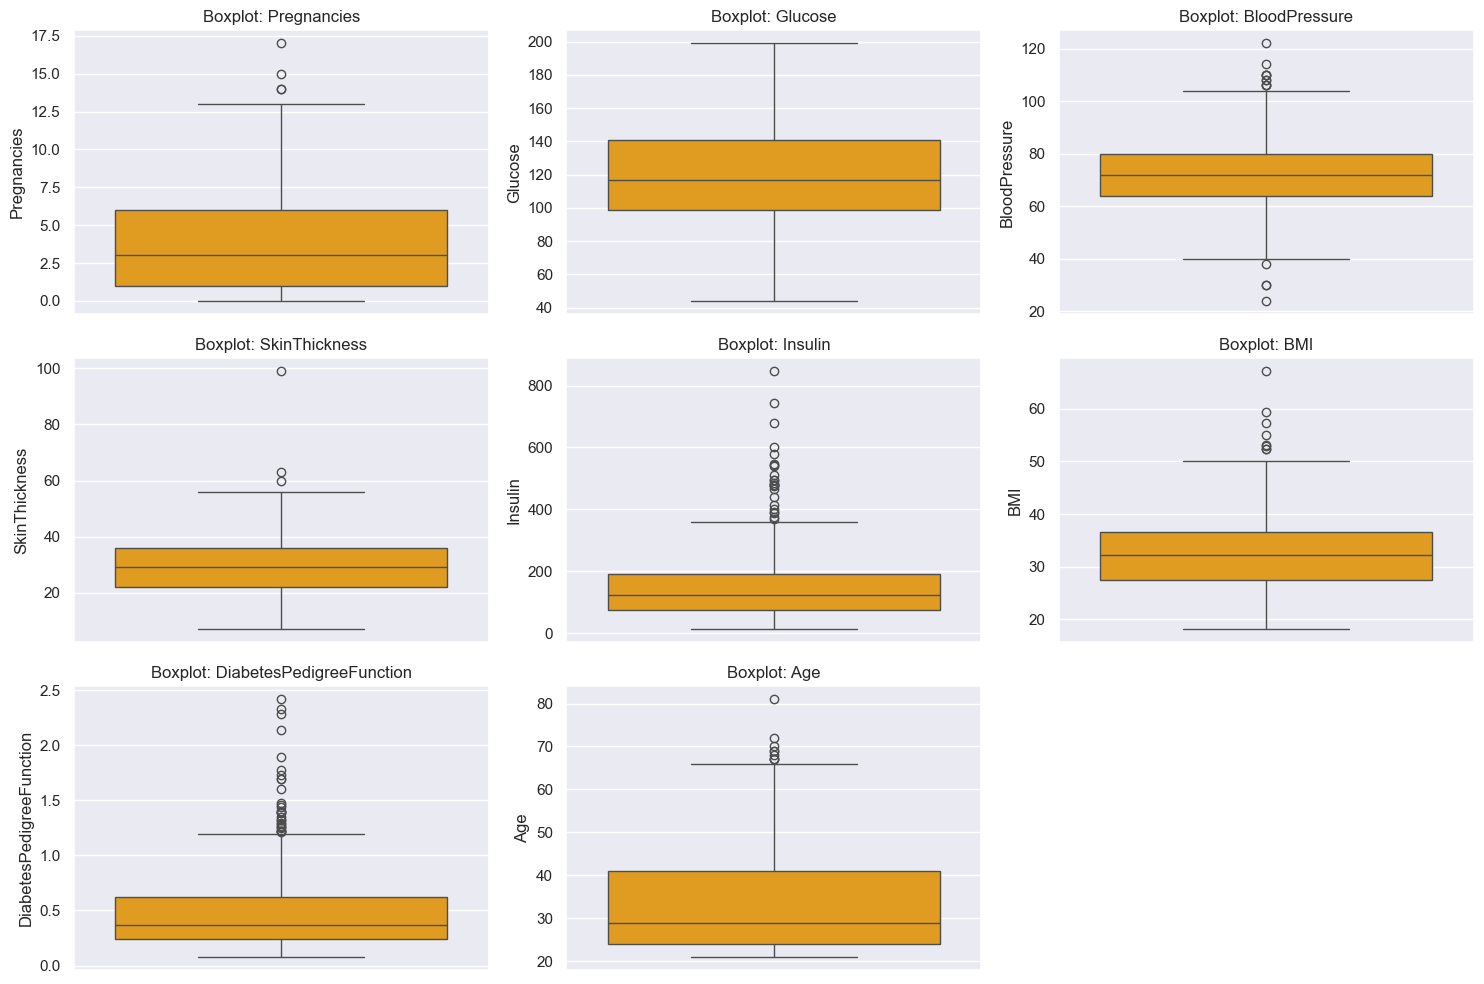

In [1280]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_copy.select_dtypes(include='number').columns):
    if col != 'Outcome':
        plt.subplot(3, 3, i+1)
        sns.boxplot(data=df_copy, y=col, color='orange')
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()

plt.show()

**Kesimpulan:**

Dalam dataset Pima Indians Diabetes, ditemukan bahwa beberapa kolom memiliki nilai minimum nol (0) yang secara medis tidak masuk akal dan mengindikasikan nilai yang hilang (missing values tersembunyi). Kolom-kolom tersebut adalah:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Secara logis, seseorang tidak mungkin memiliki kadar glukosa, tekanan darah, insulin, ketebalan kulit, atau BMI bernilai nol, sehingga nilai-nilai tersebut tidak valid sebagai pengukuran medis.

##Data Preparation

In [1281]:
import numpy as np
from sklearn.preprocessing import StandardScaler

###Data Cleansing

Drop Duplikasi Data

In [1282]:
df_copy = df_copy.drop_duplicates()

Salin ulang dari df_copy untuk keamanan

In [1283]:
df_prep = df_copy.copy()

Penanganan Nilai Tidak Valid

In [1284]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Gantikan nilai nol dengan median

In [1285]:
for col in cols_with_zeros:
    median = df_prep[col].median()
    df_prep[col] = df_prep[col].replace(0, median)

Tangani NaN jika ada setelah penggantian 0

In [1286]:
if df_prep.isnull().values.any():
    df_prep = df_prep.fillna(df_prep.median())

Deteksi dan Penanganan Outlier

In [1287]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower = quartile1 - 1.5 * iqr
    upper = quartile3 + 1.5 * iqr
    return lower, upper

def replace_with_thresholds(dataframe, variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

for col in df_copy.columns[:-1]:  # exclude Outcome
    replace_with_thresholds(df_copy, col)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3172710673.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20148\3172710673.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low


###Data Transformation

Drop kolom 'Outcome' karena tidak digunakan dalam unsupervised learning

In [1288]:
X = df_prep.drop(columns=['Outcome'])

Normalisasi Fitur

In [1289]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Convert hasil ke dataframe

In [1290]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Hasil akhir data yang telah dipersiapkan

In [1291]:
print("Data setelah normalisasi:")
X_scaled_df.head()

Data setelah normalisasi:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [1292]:
print("Statistik deskriptif setelah scaling:")
X_scaled_df.describe()

Statistik deskriptif setelah scaling:


Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean   2.613650e-16              2.451743e-16  1.931325e-16  
std    1.000652e+00              1.000652e+00  1.000652e+00  
min   -2.074783e+00             -1.189553e+00 -1.041549e+00  
25%   -7.212087e-01             -6.889685e-01 -7.862862e-01  
50%   -2.258989e-02             -3.001282e-01 -3.608474e-01  
75%    6.032562e-01              4.662269e-01  6.602056e-01  
max    5.042397e+00              5.883565e+00  4.063716e+00

##Modeling

###Model K-Means Clustering

Import Library yang digunakan

In [1293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

####Build model

Buat elbow method untuk menentukan k optimal

In [1294]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

Visualisasi Elbow Method

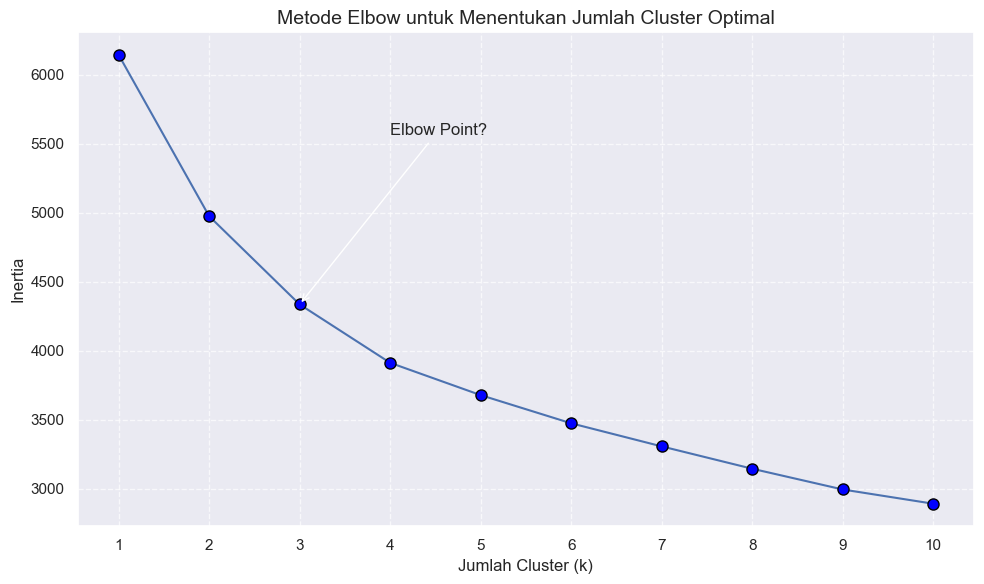

In [1295]:
inertia = []
k_range = range(1, 11)  # Mencoba k dari 1 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)  # Menggunakan data yang sudah di-scale
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8, markerfacecolor='blue', markeredgecolor='black')
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)

# Menambahkan anotasi untuk membantu interpretasi
plt.annotate('Elbow Point?',
            xy=(3, inertia[2]),
            xytext=(4, inertia[2]+inertia[0]*0.2),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

Visualisasi Silhouette Score

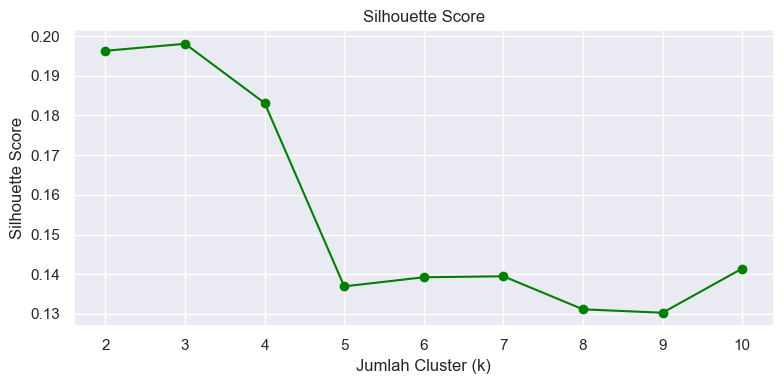

In [1296]:
plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Lakukan Klasterisasi K-Means

In [1297]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

Menyimpan hasil cluster ke DataFrame asli

In [1298]:
df_prep['Cluster'] = cluster_labels

####Evaluasi model Before

Evaluasi awal dengan Silhouette Score

In [1299]:
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score (Before Tuning): {score:.4f}")

Silhouette Score (Before Tuning): 0.1980


Buat Dataframe untuk visualisasi

In [1300]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans_final.cluster_centers_)

df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Cluster'] = cluster_labels

Visualisasi Cluster

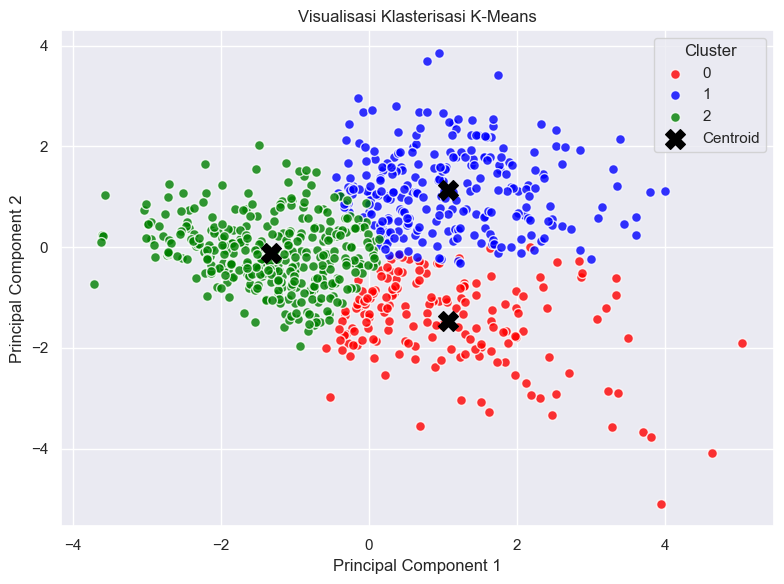

In [1301]:
colors = ['red', 'blue', 'green']
cluster_ids = sorted(df_viz['Cluster'].unique())

plt.figure(figsize=(8, 6))
for i, cluster_id in enumerate(cluster_ids):
    subset = df_viz[df_viz['Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'],
                color=colors[i],
                label=f'{cluster_id}',
                s=50, alpha=0.8, edgecolors='w')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=200, c='black', label='Centroid')

plt.title('Visualisasi Klasterisasi K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


####Model Tuning

Import Library

In [1302]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Definisikan pipe line: PCA (90% varian)

In [1303]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('pca', PCA(n_components=0.90, random_state=42)),
    ('kmeans', KMeans(random_state=42))
])

Tentukan **parameter** yang ingin dicoba

In [1304]:
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6],
    'kmeans__init':       ['k-means++', 'random'],
    'kmeans__n_init':     [10, 50],
    'kmeans__max_iter':   [300, 500]
}

Buat scorer custom untuk Silhouette

In [1305]:
def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    return silhouette_score(X, labels)

Inisialisasi GridSearchCV

In [1306]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=5,
    n_jobs=-1
)

**Fit model** dengan data yg dipakai sebelum tuning

In [1307]:
grid_search.fit(X_scaled_df)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('pca',
                                        PCA(n_components=0.9, random_state=42)),
                                       ('kmeans', KMeans(random_state=42))]),
             n_jobs=-1,
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [300, 500],
                         'kmeans__n_clusters': [2, 3, 4, 5, 6],
                         'kmeans__n_init': [10, 50]},
             scoring=<function silhouette_scorer at 0x000001FFB0232E80>)

####Evaluasi Model After

Tampilkan hasil (**parameter dan silhouette score terbaik**) dari Grid Search

In [1308]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print("Best Params:", best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

Best Params: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 2, 'kmeans__n_init': 50}
Best Silhouette Score: 0.1950


Tambahkan hasil klaster ke DataFrame asli

In [1309]:
labels_tuned = best_model.predict(X_scaled_df)
df_copy['Cluster_Tuned_PCA'] = labels_tuned

hasil transformasi PCA dan label cluster

In [1310]:
X_imputed = best_model.named_steps['imputer'].transform(X_scaled_df)
X_pca = best_model.named_steps['pca'].transform(X_imputed)
labels = best_model.named_steps['kmeans'].labels_
centroids = best_model.named_steps['kmeans'].cluster_centers_

Visualisasi Distibusi Cluster Setelah tunning

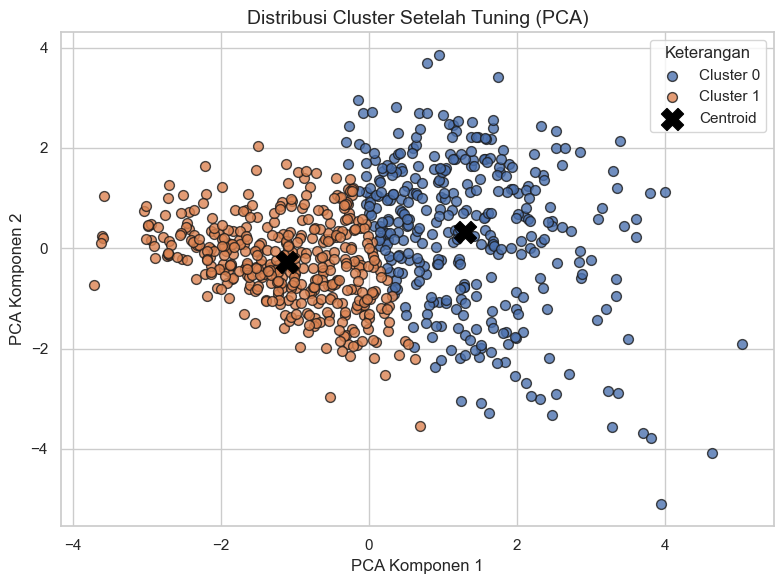

In [1311]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

for cluster_id in np.unique(labels):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        s=50, edgecolor='k', alpha=0.8
    )

plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='black', s=250, marker='X', label='Centroid'
)

plt.title('Distribusi Cluster Setelah Tuning (PCA)', fontsize=14)
plt.xlabel('PCA Komponen 1', fontsize=12)
plt.ylabel('PCA Komponen 2', fontsize=12)
plt.legend(title='Keterangan', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

#Deployment

##Save Model

In [1312]:
from joblib import dump
dump(log_reg, 'logistic_model.joblib')
dump(kmeans, 'kmeans_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

##Konfigurasi Streamlit untuk deployment

In [1313]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, silhouette_score)
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from joblib import load

# Konfigurasi halaman
st.set_page_config(
    page_title="Dashboard Prediksi dan Segmentasi Risiko Diabetes",
    page_icon="🩺",
    layout="wide"
)

# Kolom yang nilai nol dianggap invalid
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Fungsi untuk memuat data dan model
def load_all_assets():
    # Muat model dan scaler
    log_reg = load('logistic_model.joblib')
    scaler = load('scaler.joblib')

    # Muat data
    df = pd.read_csv(
        'https://raw.githubusercontent.com/ulhaqdhifulloh/TUBES-DATMIN-TEAM2-SI4706/main/diabetes.csv'
    )
    # Simpan salinan sebelum preprocessing
    df_original = df.copy()

    # Ganti nilai 0 dengan NaN pada kolom tertentu
    df[zero_cols] = df[zero_cols].replace(0, np.nan)

    # Tangani missing values
    df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
    df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
    df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
    df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
    df['BMI'].fillna(df['BMI'].median(), inplace=True)

    # Tangani duplikasi
    df.drop_duplicates(inplace=True)

    # Tangani outlier menggunakan IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Definisikan fitur dan target
    feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    X = df[feature_cols]
    y = df['Outcome']

    # Standarisasi fitur
    X_scaled = scaler.transform(X)

    # Model KMeans
    kmeans_model = KMeans(n_clusters=2, init='k-means++', n_init=10,
                        max_iter=300, random_state=42)
    kmeans_model.fit(X_scaled)

    # Kembalikan semua aset
    return log_reg, scaler, kmeans_model, X_scaled, y, df, feature_cols, df_original

# Muat semua aset
everything = load_all_assets()
log_reg, scaler, kmeans_model, X_scaled, y, df, feature_cols, df_original = everything

# Judul utama
st.title("🩺 Dashboard Interaktif: Analisis Risiko & Segmentasi Diabetes Pasien Pima Indian")
st.markdown("""
Selamat datang di dashboard analisis risiko diabetes. Dashboard ini bertujuan untuk:
- Membantu identifikasi dini pasien yang berisiko tinggi mengidap diabetes.
- Melakukan segmentasi pasien berdasarkan karakteristik medis untuk pemahaman yang lebih baik.
""")

# Definisi tab
tabs = st.tabs([
    "📊 Business Understanding",
    "📈 Data Understanding",
    "🔍 Exploratory Data Analysis",
    "🛠️ Data Preprocessing",
    "🤖 Modeling & Evaluation",
    "🧪 Prediksi Risiko Diabetes"
])

# --- Tab 1: Business Understanding ---
with tabs[0]:
    st.header("📊 Business Understanding")
    st.subheader("1. Define Business Objectives")
    st.markdown("""
    Tujuan utama dari proyek ini adalah untuk membantu tenaga medis atau institusi kesehatan dalam
    mengidentifikasi pasien yang berisiko tinggi mengidap diabetes. Dengan prediksi yang akurat,
    intervensi dini dapat dilakukan untuk mencegah komplikasi lebih lanjut.
    """)

    st.subheader("2. Assess Current Situation")
    st.markdown("""
    Saat ini, diagnosis diabetes seringkali dilakukan setelah gejala muncul, yang dapat terlambat untuk
    pencegahan. Dengan memanfaatkan data historis dan teknik pembelajaran mesin, kita dapat
    mengidentifikasi pola yang menunjukkan risiko diabetes sebelum gejala muncul.
    """)

    st.subheader("3. Formulate Data Mining Problem")
    st.markdown("""
    Merumuskan masalah sebagai klasifikasi biner: apakah seorang pasien berisiko mengidap diabetes
    (1) atau tidak (0), berdasarkan fitur medis yang tersedia.
    """)

    st.subheader("4. Determine Project Objectives")
    st.markdown("""
    - Membangun model prediksi risiko diabetes dengan akurasi tinggi.
    - Melakukan segmentasi pasien untuk memahami kelompok risiko yang berbeda.
    - Menyediakan dashboard interaktif untuk eksplorasi data dan prediksi.
    """)

    st.subheader("5. Plan Project")
    st.markdown("""
    - **Tahap 1:** Pengumpulan dan pemahaman data.
    - **Tahap 2:** Eksplorasi dan visualisasi data.
    - **Tahap 3:** Pra-pemrosesan data.
    - **Tahap 4:** Pembangunan dan evaluasi model.
    - **Tahap 5:** Implementasi dashboard interaktif.
    """)

# --- Tab 2: Data Understanding ---
with tabs[1]:
    st.header("📈 Data Understanding")
    st.markdown("Dataset yang digunakan adalah Pima Indians Diabetes Dataset yang berisi informasi medis dari 768 wanita Pima Indian berusia minimal 21 tahun.")

    st.subheader("1. Struktur Dataset")
    st.write(f"Jumlah baris dan kolom: {df.shape}")

    st.subheader("2. Informasi Dataset")
    st.dataframe(df.head())

    st.subheader("3. Statistik Deskriptif")
    st.dataframe(df.describe())

    st.subheader("4. Cek Missing Values")
    st.write(df.isnull().sum())

    st.subheader("5. Cek Duplikasi Data")
    st.write(f"Jumlah data duplikat: {df.duplicated().sum()}")

# --- Tab 3: Exploratory Data Analysis ---
with tabs[2]:
    st.header("🔍 Exploratory Data Analysis")
    st.subheader("1. Korelasi antar fitur")
    fig_corr, ax_corr = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax_corr)
    st.pyplot(fig_corr)

    st.subheader("2. Pair Plot")
    sns.pairplot(df[feature_cols + ['Outcome']], hue='Outcome')
    st.pyplot()

    st.subheader("3. Distribusi fitur penting")
    cols_to_plot = ['Age', 'Glucose', 'BMI']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i, col in enumerate(cols_to_plot):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribusi {col}')
    st.pyplot(fig)

# --- Tab 4: Data Preprocessing ---
with tabs[3]:
    st.header("🛠️ Data Preprocessing")
    st.markdown("Berikut adalah ringkasan proses pra-pemrosesan yang dilakukan:")
    st.markdown("""
    - Mengganti nilai 0 pada kolom medis yang tidak valid menjadi NaN
    - Mengisi nilai NaN menggunakan mean atau median
    - Normalisasi fitur menggunakan `StandardScaler`
    """)

    st.subheader("1. Penanganan Missing Values")
    st.markdown("""
    Nilai 0 pada kolom tertentu dianggap sebagai missing values dan telah digantikan dengan nilai mean atau median yang sesuai.
    """)

    st.subheader("2. Penanganan Duplikasi Data")
    st.markdown("Data duplikat telah dihapus untuk memastikan integritas data.")

    st.subheader("3. Penanganan Outlier")
    st.markdown("Outlier telah diidentifikasi dan dihapus menggunakan metode IQR.")
    fig3, ax3 = plt.subplots()
    sns.boxplot(data=df[feature_cols], ax=ax3)
    plt.xticks(rotation=90)
    st.pyplot(fig3)
    
    st.subheader("Sebelum dan Sesudah Preprocessing")
    col1, col2 = st.columns(2)
    with col1:
        st.markdown("Sebelum:")
        st.dataframe(df_original[zero_cols].head())
    with col2:
        st.markdown("Sesudah:")
        st.dataframe(df[zero_cols].head())

# --- Tab 5: Modeling & Evaluation ---
with tabs[4]:
    st.header("🤖 Modeling & Evaluation")
    y_pred = log_reg.predict(X_scaled)
    st.subheader("1. Logistic Regression")
    st.markdown(f"- **Akurasi:** {accuracy_score(y, y_pred):.3f}")
    st.markdown(f"- **Presisi:** {precision_score(y, y_pred):.3f}")
    st.markdown(f"- **Recall:** {recall_score(y, y_pred):.3f}")
    st.markdown(f"- **F1-score:** {f1_score(y, y_pred):.3f}")
    cm = confusion_matrix(y, y_pred)
    fig4, ax4 = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax4)
    st.pyplot(fig4)

    st.subheader("2. K-Means Clustering")
    cluster_labels = kmeans_model.predict(X_scaled)
    df['Cluster'] = cluster_labels
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    centroids = pca.transform(kmeans_model.cluster_centers_)
    fig5, ax5 = plt.subplots()
    colors = ['purple', 'green']
    for cluster in range(2):
        ax5.scatter(
            X_pca[cluster_labels == cluster, 0],
            X_pca[cluster_labels == cluster, 1],
            s=50,
            c=colors[cluster],
            label=f'Cluster {cluster}'
        )
    ax5.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroid')
    ax5.set_title('PCA Clustering with Centroids')
    ax5.legend()
    st.pyplot(fig5)

    st.subheader("Karakteristik per Cluster")
    st.dataframe(df.groupby('Cluster')[feature_cols].mean())

    fig6, ax6 = plt.subplots()
    df.groupby('Cluster')[feature_cols].mean().T.plot(kind='bar', ax=ax6)
    st.pyplot(fig6)

    fig7, ax7 = plt.subplots()
    df['Cluster'].value_counts().sort_index().plot(kind='bar', ax=ax7)
    ax7.set_title("Jumlah Pasien per Cluster")
    st.pyplot(fig7)

    st.subheader("Silhouette Score")
    sil = silhouette_score(X_scaled, cluster_labels)
    st.markdown(f"- **Silhouette Score:** {sil:.3f}")

# --- Tab 6: Prediksi Risiko Diabetes ---
with tabs[5]:
    st.header("🧪 Prediksi Risiko Diabetes")
    st.subheader("Masukkan Data Pasien untuk Prediksi")
    
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)
        with col1:
            Pregnancies = st.number_input("Jumlah Kehamilan", 0, 20, 1)
            Glucose = st.number_input("Glukosa", 0, 200, 120)
            BloodPressure = st.number_input("Tekanan Darah", 0, 140, 70)
            SkinThickness = st.number_input("Ketebalan Kulit", 0, 100, 20)
        with col2:
            Insulin = st.number_input("Insulin", 0, 600, 80)
            BMI = st.number_input("BMI", 0.0, 60.0, 25.0)
            DiabetesPedigreeFunction = st.number_input("DPF", 0.0, 3.0, 0.5)
            Age = st.number_input("Umur", 0, 120, 33)

        submitted = st.form_submit_button("🔍 Prediksi Risiko Diabetes")

    if submitted:
        # Susun data input sesuai urutan fitur
        input_data = np.array([[Pregnancies, Glucose, BloodPressure,
                                SkinThickness, Insulin, BMI,
                                DiabetesPedigreeFunction, Age]])
        # Standarisasi
        input_scaled = scaler.transform(input_data)
        # Prediksi
        prediction = log_reg.predict(input_scaled)
        prediction_proba = log_reg.predict_proba(input_scaled)[0][1]
        cluster_pred = kmeans_model.predict(input_scaled)[0]

        st.subheader("🔎 Hasil Prediksi")
        if prediction[0] == 1:
            st.error(f"⚠️ Pasien diprediksi **BERISIKO** mengidap diabetes dengan probabilitas {prediction_proba:.2%}.")
        else:
            st.success(f"✅ Pasien diprediksi **TIDAK BERISIKO** mengidap diabetes dengan probabilitas {prediction_proba:.2%}.")

        st.subheader("👥 Segmentasi Pasien")
        st.info(f"Pasien tergolong dalam **Cluster {cluster_pred}**, dengan karakteristik mirip kelompok pasien lainnya dalam cluster ini.")

        st.markdown("📌 *Catatan: Prediksi ini hanya sebagai alat bantu dan bukan pengganti diagnosis profesional.*")

# Footer
st.markdown("---")
st.markdown(
    "<p style='text-align: center;'>© 2025 - Kelompok 2 SI4706 - Tugas Besar Data Mining</p>",
    unsafe_allow_html=True
)

Overwriting app.py
